       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std                    2.825908                14.033506   
min                    1.000000                50.000000   
25%                    3.000000                62.000000   
50%                    6.000000                77.000000   
75%                    8.000000                86.500000   
max                   10.000000                98.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                     100.000000                            100.000000   
mean                        2.670000                              8.680000   
std                         2.064882                              6.340315   
min                         0.000000                              0.000000   
25%                         1.000000                              2.0

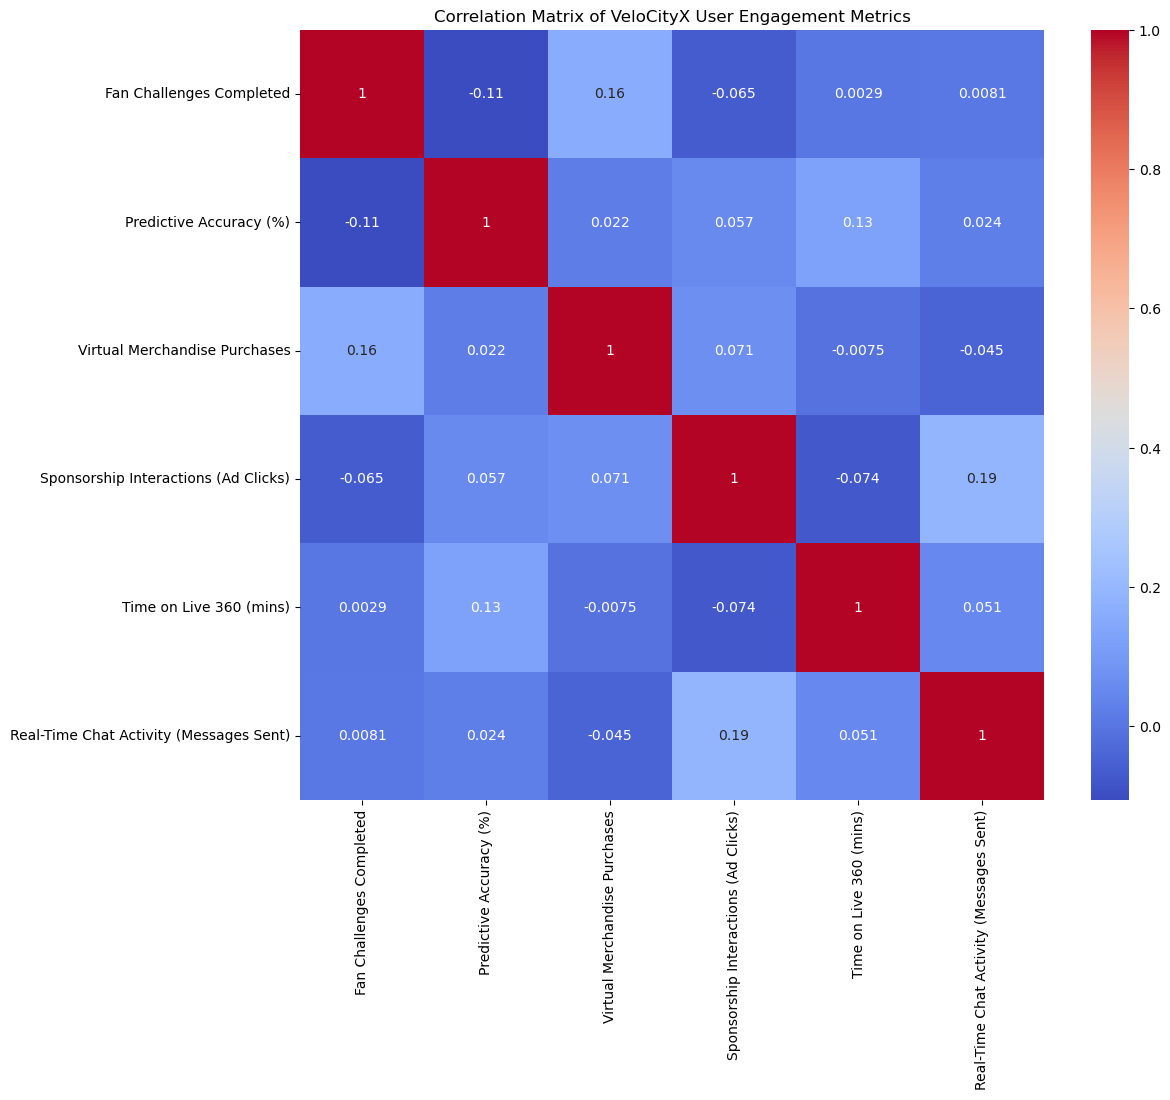

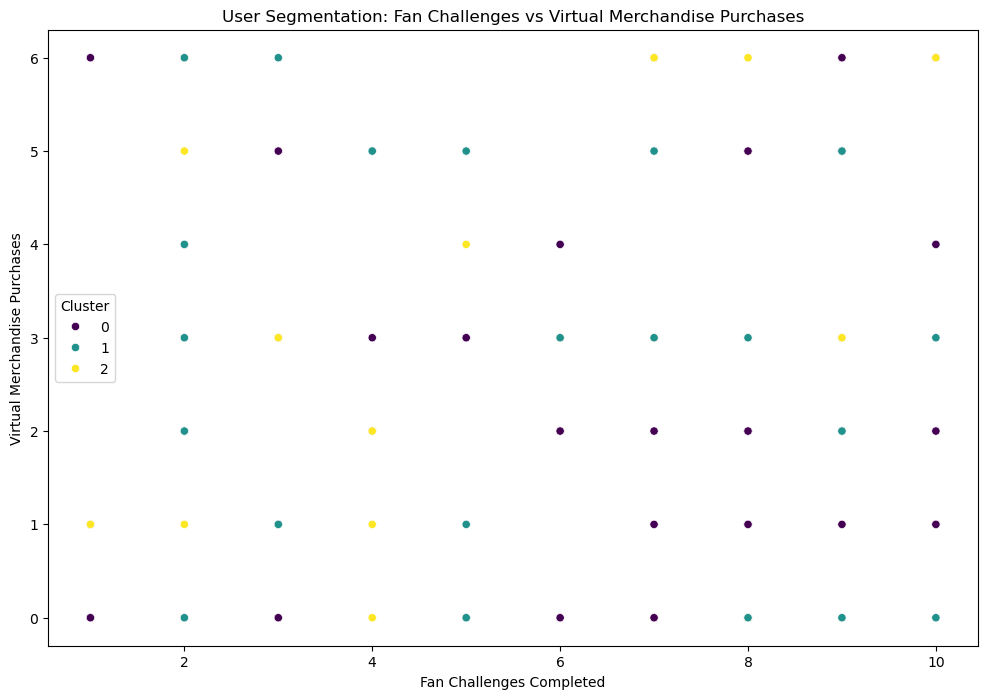

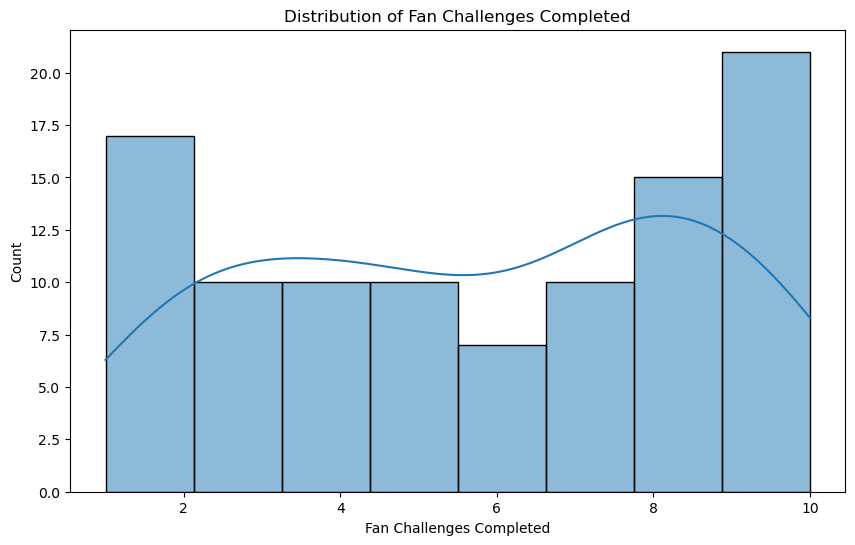

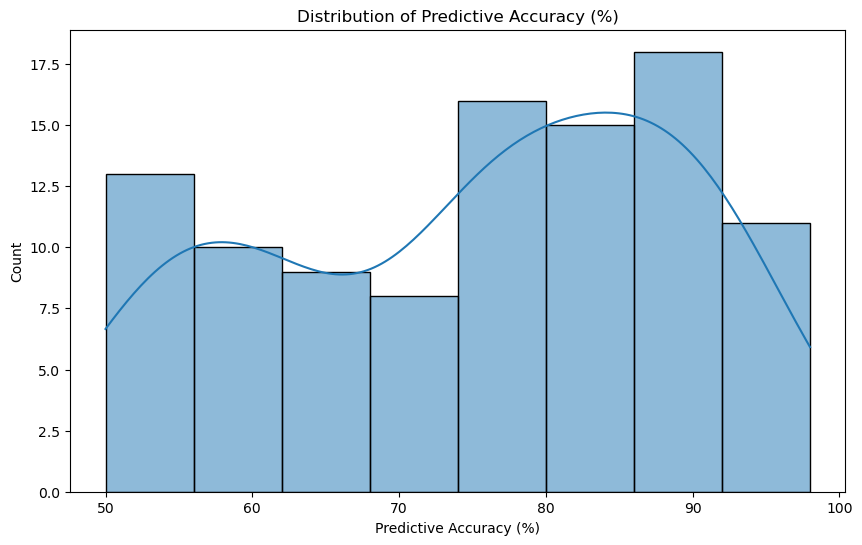

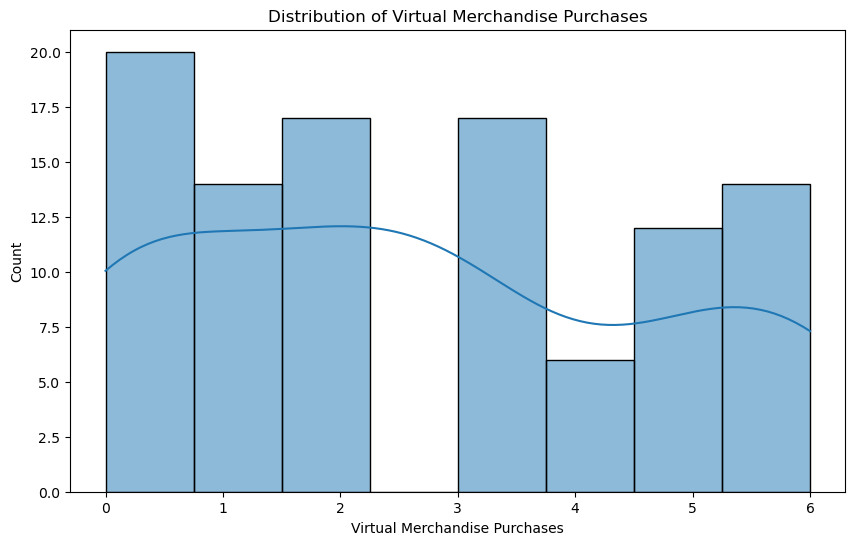

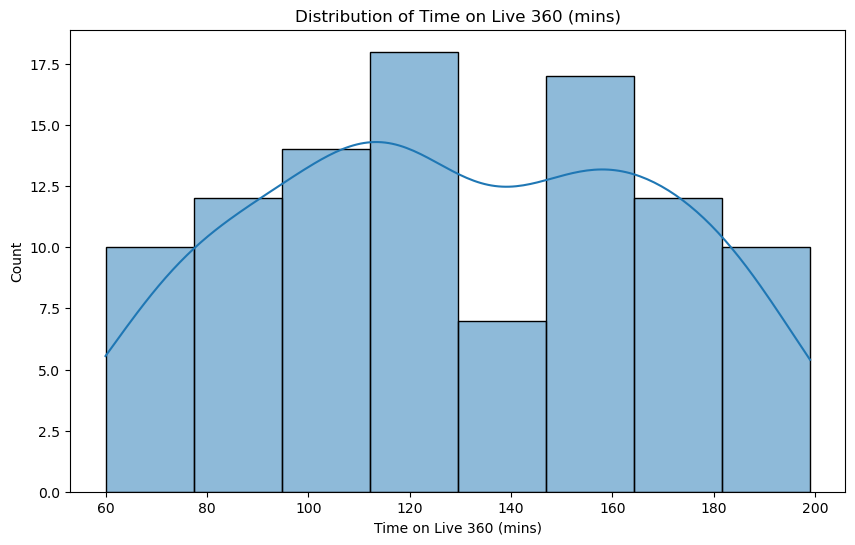

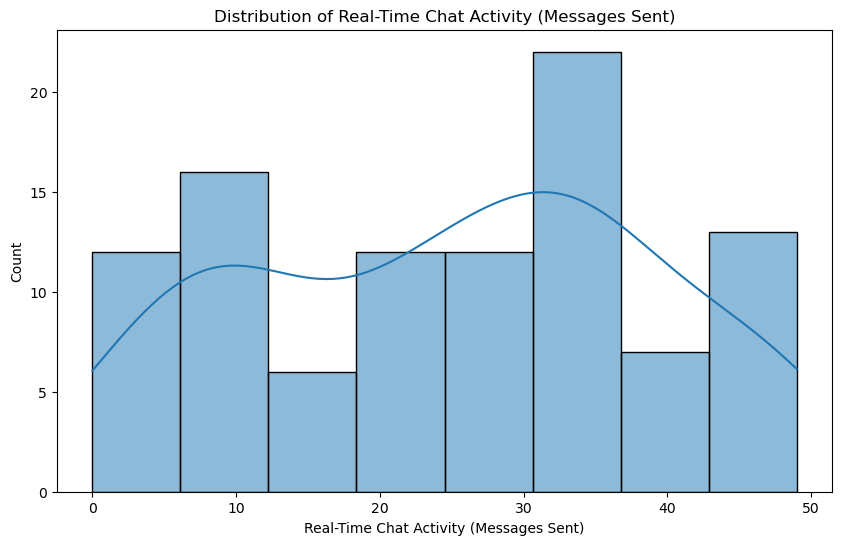

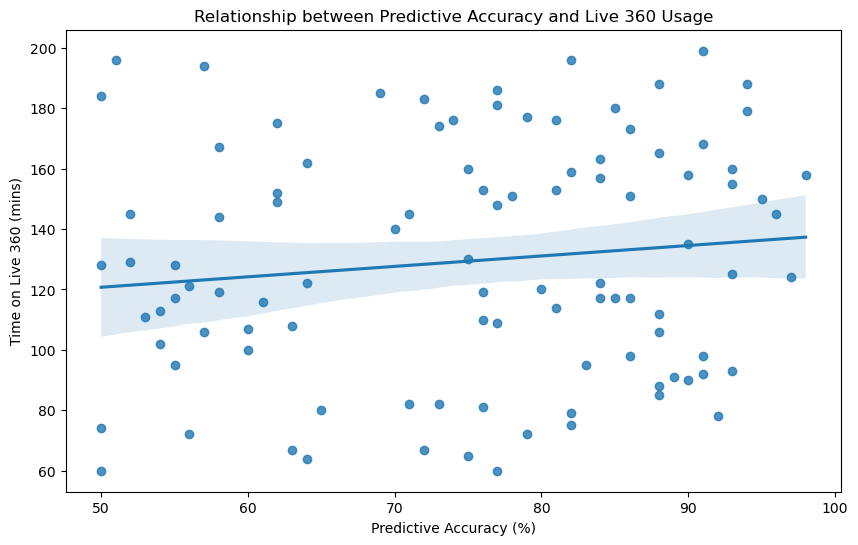

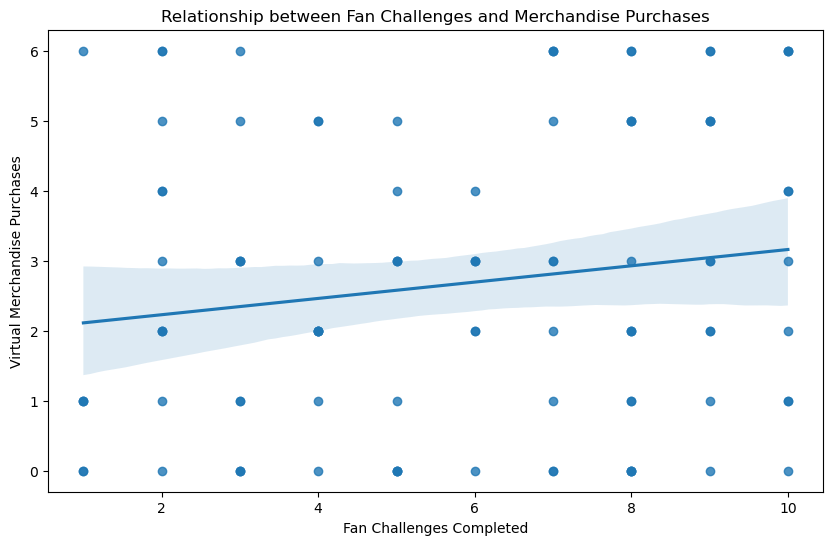

Key Insights:
Average fan challenges completed: 5.79
Average predictive accuracy: 74.99%
Percentage of users who made a purchase: 80.00%
Average time spent on Live 360: 129.35 minutes
Average number of chat messages sent: 25.05


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

# Set 'User ID' as the index
df.set_index('User ID', inplace=True)

# Basic statistics
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of VeloCityX User Engagement Metrics')
plt.show()

# User segmentation using K-means clustering
features = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 
            'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']
X = df[features]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Cluster', palette='viridis')
plt.title('User Segmentation: Fan Challenges vs Virtual Merchandise Purchases')
plt.show()

# Analyze engagement patterns
engagement_metrics = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 
                      'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']

for metric in engagement_metrics:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=metric, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.show()

# Analyze relationship between predictive accuracy and Live 360 usage
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Predictive Accuracy (%)', y='Time on Live 360 (mins)')
plt.title('Relationship between Predictive Accuracy and Live 360 Usage')
plt.show()

# Analyze relationship between fan challenges and merchandise purchases
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Fan Challenges Completed', y='Virtual Merchandise Purchases')
plt.title('Relationship between Fan Challenges and Merchandise Purchases')
plt.show()

# Print insights
print("Key Insights:")
print(f"Average fan challenges completed: {df['Fan Challenges Completed'].mean():.2f}")
print(f"Average predictive accuracy: {df['Predictive Accuracy (%)'].mean():.2f}%")
print(f"Percentage of users who made a purchase: {(df['Virtual Merchandise Purchases'] > 0).mean() * 100:.2f}%")
print(f"Average time spent on Live 360: {df['Time on Live 360 (mins)'].mean():.2f} minutes")
print(f"Average number of chat messages sent: {df['Real-Time Chat Activity (Messages Sent)'].mean():.2f}")